# Machine Learning Classification Model

Object `?` not found.


## Load the data

In [2]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2024-09-11,415.500000,423.989990,409.579987,423.040009,19266900,0.927398,UP
2024-09-12,423.309998,427.369995,419.750000,427.000000,17418800,0.833739,UP
2024-09-13,425.829987,431.829987,425.459991,430.589996,15874600,0.173877,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [3]:
target = df.change_tomorrow_direction

In [4]:
explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model_dt = DecisionTreeClassifier(max_depth=15)

In [7]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=15)

In [8]:
target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2024-09-11      UP
2024-09-12      UP
2024-09-13      UP
2024-09-16      UP
2024-09-17    DOWN
Name: change_tomorrow_direction, Length: 1955, dtype: object

### Visualize the model

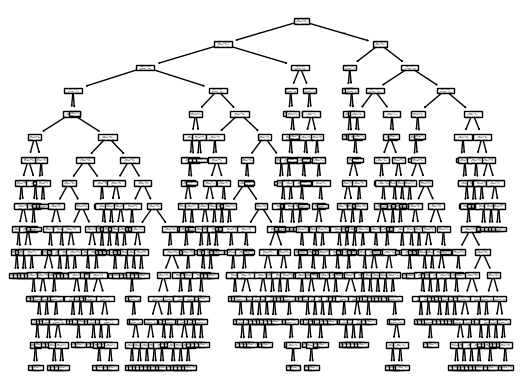

In [9]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [10]:
y_pred = model_dt.predict(X=explanatory)

In [11]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2024-09-11,415.500000,423.989990,409.579987,423.040009,19266900
2024-09-12,423.309998,427.369995,419.750000,427.000000,17418800
2024-09-13,425.829987,431.829987,425.459991,430.589996,15874600


In [12]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2024-09-11,UP,UP
2024-09-12,UP,DOWN
2024-09-13,UP,DOWN


### Evaluate the model: compare predictions with the reality

In [13]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [14]:
comp.sum()

1580

In [15]:
len(comp)

1955

In [16]:
#accuracy of the model
comp.sum() / len(comp)

0.8081841432225064

In [17]:
#score does the calculation we did by hand comp.sum / len(comp)
model_dt.score(X=explanatory, y=target)

0.8081841432225064

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [18]:
import os

In [ ]:
os.makedirs('models')

In [19]:
model_dt

DecisionTreeClassifier(max_depth=15)

In [20]:
import pickle

In [21]:
with open('models/models_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [ ]:
#Testing GitHub